# Вызываем библиотеки

In [2]:
%matplotlib inline
import sklearn
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.neural_network import MLPClassifier, MLPRegressor
from tensorflow import keras
from tensorflow.keras import layers
import random
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error
import seaborn as sns

# Первая часть

**Загрузка датасета Boston**

In [3]:
dataset = datasets.load_boston()
df = pd.DataFrame(data=dataset['data'], columns=dataset['feature_names'])
df['target']=dataset['target']

**Разделение датасета на тренировочную и тестовую выборки**

In [4]:
def razdelit_dataset(dataframe):
    train_df = dataframe.sample(frac=.8, random_state=42)
    test_df = dataframe[~dataframe.index.isin(train_df.index)]
    return train_df, test_df
train_df, test_df = razdelit_dataset(df)

**Обработка данных**

In [5]:
train_y = np.asanyarray(train_df[['target']])
test_y = np.asanyarray(test_df[['target']])
#train_df = train_df.drop(columns='target')
#test_df = test_df.drop(columns='target')
train_X = np.asanyarray(train_df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']])
test_X = np.asanyarray(test_df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']])

**Обучение модели**

In [6]:
results_mpl = pd.DataFrame()
for num in range(1,100):
    model = MLPRegressor(hidden_layer_sizes=(num,), max_iter=50000, random_state=42, batch_size=32, activation = 'tanh', learning_rate="adaptive")
    model.fit(train_X, train_y.ravel())
    preds = model.predict(test_X)
    result = {'n_hidden_neurons':[num], 'R2_score': [r2_score(test_y, preds)],'MSE': [mean_squared_error(test_y, preds)]}
    results_mpl = results_mpl.append(pd.DataFrame.from_dict(result))
print(results_mpl)

    n_hidden_neurons  R2_score        MSE
0                  1 -0.000417  71.936378
0                  2 -0.000385  71.934080
0                  3 -0.007349  72.434842
0                  4  0.164604  60.070320
0                  5  0.553539  32.103397
..               ...       ...        ...
0                 95  0.695143  21.921149
0                 96  0.687921  22.440464
0                 97  0.684290  22.701584
0                 98  0.697380  21.760289
0                 99  0.725610  19.730428

[99 rows x 3 columns]


In [7]:
results_mpl.sort_values(by='R2_score').tail()

,n_hidden_neurons,R2_score,MSE
0,80,0.735902,18.990367
0,93,0.737198,18.897164
0,89,0.739086,18.761422
0,85,0.747439,18.160783
0,87,0.751198,17.890434


# Вторая часть

**Считывание данных из csv файлов**

In [8]:
#Вторая часть с Titanic dataset
#Считывание данных из csv файлов

tit_train_df = pd.read_csv('train.csv')
tit_test_df = pd.read_csv('test.csv')

In [9]:
tit_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
tit_train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Обработка данных**

In [11]:
#Обработка данных
sex = {'male': 1,'female':2,}
embarked = {'S': 1,'C': 2,'Q': 3}
tit_train_df['Sex'] = tit_train_df['Sex'].map(sex)
tit_train_df['Embarked'] = tit_train_df['Embarked'].map(embarked)
med = tit_train_df[['Age']].median(axis=0)
tit_train_df[['Age']]=tit_train_df[['Age']].fillna(med)
tit_train_df[['Embarked']]=tit_train_df[['Embarked']].fillna(0)
tit_train_df['Cabin'].fillna('Z', inplace=True)
tit_train_df['Cabin_letter'] = tit_train_df['Cabin'].str[0]  
cabin = pd.get_dummies(tit_train_df,columns=['Cabin_letter'])

In [12]:
tit_train_df = cabin

In [13]:
tit_train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Cabin_letter_A,Cabin_letter_B,Cabin_letter_C,Cabin_letter_D,Cabin_letter_E,Cabin_letter_F,Cabin_letter_G,Cabin_letter_T,Cabin_letter_Z
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,1.0,0,0,0,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,...,2.0,0,0,1,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,...,1.0,0,0,0,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,...,1.0,0,0,1,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,1.0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,...,1.0,0,0,0,0,0,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",2,19.0,0,0,112053,30.0000,...,1.0,0,1,0,0,0,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",2,28.0,1,2,W./C. 6607,23.4500,...,1.0,0,0,0,0,0,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,...,2.0,0,0,1,0,0,0,0,0,0


In [14]:
train_df, test_df = razdelit_dataset(tit_train_df)
train_y = np.asanyarray(train_df[['Survived']])
test_y = np.asanyarray(test_df[['Survived']])
train_df = train_df.drop(columns=['Survived','Name','Ticket','PassengerId','Cabin'])
test_df = test_df.drop(columns=['Survived','Name','Ticket','PassengerId','Cabin'])
train_x = np.asanyarray(train_df)
test_x = np.asanyarray(test_df)

**Обучение модели**

In [15]:
#Обучение модели
%%time
from tensorflow.keras.optimizers import SGD
batch_size = 32
epochs = 150
learning_rate=0.01

model = keras.Sequential(
    [
        keras.Input(shape=train_x.shape[1]),
        layers.Dense(64, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ]
)

model.compile(loss="binary_crossentropy", optimizer='adam', metrics = ['accuracy'])
#load_status = model.load_weights("ckpt")
history = model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=0)
#model.save_weights("ckpt")

Wall time: 4.29 s


In [16]:
score=model.evaluate(test_x,test_y, batch_size=batch_size,)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

6/6 [==============================] - 0s 665us/step - loss: 0.4533 - accuracy: 0.8371
Test loss: 0.45325136184692383
Test accuracy: 0.8370786309242249


In [52]:
df1=pd.DataFrame(model.predict(test_x))

In [53]:
df1["test_y"]=test_y

In [54]:
df1

,0,test_y
0,0.865403,1
1,0.065045,0
2,0.021803,0
3,0.749256,0
4,0.144216,0
...,...,...
173,0.584238,0
174,0.950629,1
175,0.051136,0
176,0.150242,0


In [17]:
results = pd.DataFrame()
for num in range(1,40):
    model = keras.Sequential(
    [
        keras.Input(shape=train_x.shape[1]),
        layers.Dense(num, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(loss="binary_crossentropy", optimizer='adam', metrics = ['accuracy'])
    history = model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=0)
    
    result = {'n_hidden_neurons':[num], 'Accuracy': [model.evaluate(test_x,test_y, batch_size=batch_size,verbose=0)[1]],'Loss': [model.evaluate(test_x,test_y, batch_size=batch_size,verbose=0)[0]]}
    results = results.append(pd.DataFrame.from_dict(result))

In [18]:
print(results)

   n_hidden_neurons  Accuracy      Loss
0                 1  0.634831  0.657337
0                 2  0.634831  0.657570
0                 3  0.724719  0.566708
0                 4  0.719101  0.527326
0                 5  0.747191  0.554699
0                 6  0.786517  0.469540
0                 7  0.730337  0.506833
0                 8  0.814607  0.455105
0                 9  0.792135  0.469297
0                10  0.747191  0.465997
0                11  0.775281  0.468743
0                12  0.808989  0.458471
0                13  0.825843  0.431430
0                14  0.808989  0.440323
0                15  0.831461  0.425372
0                16  0.803371  0.447700
0                17  0.825843  0.452875
0                18  0.820225  0.435672
0                19  0.820225  0.444278
0                20  0.825843  0.456756
0                21  0.808989  0.438719
0                22  0.808989  0.448663
0                23  0.786517  0.454590
0                24  0.797753  0.457734


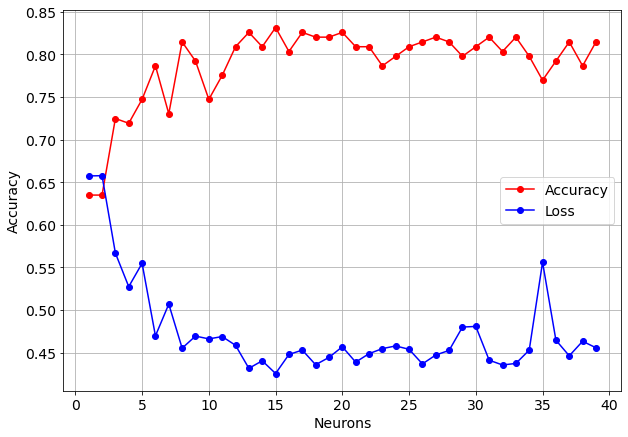

In [19]:
plt.rcParams.update({'font.size': 14})
plt.pyplot.figure(figsize=(10, 7))
plt.pyplot.plot(results[['n_hidden_neurons']],results[['Accuracy']], 'ro-', label='Accuracy');
plt.pyplot.plot(results[['n_hidden_neurons']],results[['Loss']], 'bo-',label='Loss');
plt.pyplot.xlabel('Neurons')
plt.pyplot.ylabel('Accuracy')
plt.pyplot.grid()
plt.pyplot.legend()

In [20]:
results.sort_values(by='Accuracy').tail()

,n_hidden_neurons,Accuracy,Loss
0,27,0.820225,0.447097
0,17,0.825843,0.452875
0,13,0.825843,0.431430
0,20,0.825843,0.456756
0,15,0.831461,0.425372


**Random search**

In [21]:
#Random search
random.seed(42)
rand_ar = random.sample(range(1, 100),39)
rand_ar.sort()

In [32]:
resultss = pd.DataFrame()
for num in range(0,39):
    rand = rand_ar[num]
    model = keras.Sequential(
    [
        keras.Input(shape=train_x.shape[1]),
        layers.Dense(rand, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(loss="binary_crossentropy", optimizer='adam', metrics = ['accuracy'])
    history = model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=0)
    
    result = {'n_hidden_neurons':[rand], 'Accuracy': [model.evaluate(test_x,test_y, batch_size=batch_size,verbose=0)[1]],'Loss': [model.evaluate(test_x,test_y, batch_size=batch_size,verbose=0)[0]]}
    resultss = resultss.append(pd.DataFrame.from_dict(result))

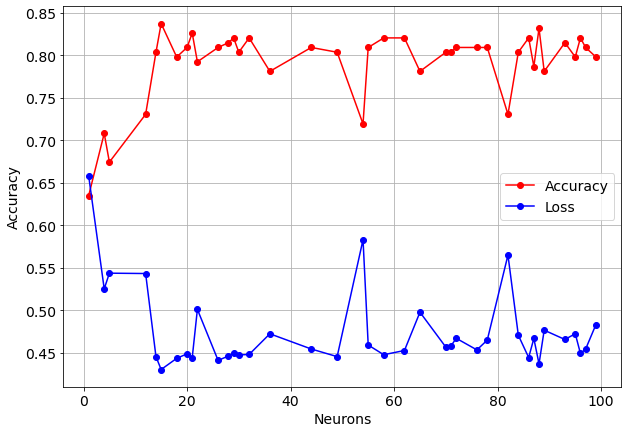

In [33]:
plt.rcParams.update({'font.size': 14})
plt.pyplot.figure(figsize=(10, 7))
plt.pyplot.plot(resultss[['n_hidden_neurons']],resultss[['Accuracy']], 'ro-', label='Accuracy');
plt.pyplot.plot(resultss[['n_hidden_neurons']],resultss[['Loss']], 'bo-',label='Loss');
plt.pyplot.xlabel('Neurons')
plt.pyplot.ylabel('Accuracy')
plt.pyplot.grid()
plt.pyplot.legend()

In [34]:
resultss.sort_values(by='Accuracy').tail()

,n_hidden_neurons,Accuracy,Loss
0,32,0.820225,0.447966
0,96,0.820225,0.449139
0,21,0.825843,0.444083
0,88,0.831461,0.436886
0,15,0.837079,0.430265
